<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 2. Trabajando con redes neuronales y Deep Learning</header1></left>

Presentado por: Andres Deulofeu  <br>
Fecha: 26/05/2024

# Importación de librerias necesarias

# Parte II. Clasificación

In [2]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

## Cargar el Dataset

Con al menos 2086 instancias, una variable/atributo de la salida, y que dependa de, al menos, 6 variables/atributos de entrada. 

In [4]:
#Código para cargar el Dataset
url = 'https://raw.githubusercontent.com/adeulofeu/Portfolio/main/Machine%20learning/classification/Obesity%20Risk%20Prediction%20Cleaned/estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.csv'
df = pd.read_csv(url)

## Descripción de la fuente del Dataset

Dataset: Multi-Class Classification for Obesity Risk Levels

Descripción: Este dataset es una recopilación de datos de pacientes en el cual se clasifican por niveles de obesidad, teniendo en cuenta atributos hereditarios, de consumo de alimentos, estilo de vida y morfología general. Este modelo puede ayudar a predecir el nivel de obesidad de un paciente.

Enlace: https://www.kaggle.com/datasets/ikjotsingh221/obesity-risk-prediction-cleaned/data 

## Explique el problema a resolver. 
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes (no son necesarios contenidos teóricos, sino explicar qué relaciones tratas de comprobar y con qué métodos).

Descripción del problema: Problema de clasificación multiclase

Variable objetivo: NObeyesdad

Utilidad de la posible solución:  Este modelo puede ser útil en el ambito medico, para la valoración medica general de pacientes en niveles de obesidad teniendo en cuenta varaibles adicionales al peso y la altura, como su estilo de alimentación.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
>- Número de instancias pertenecientes a cada clase en la variable objetivo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

Se incorporá una pequeña descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


In [16]:
# Analisis de completitud del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Height                          2086 non-null   float64
 1   Weight                          2086 non-null   float64
 2   family_history_with_overweight  2086 non-null   int64  
 3   SCC                             2086 non-null   int64  
 4   MTRANS_Walking                  2086 non-null   int64  
 5   FAVC_z                          2086 non-null   float64
 6   FCVC_minmax                     2086 non-null   float64
 7   NCP_z                           2086 non-null   float64
 8   CAEC_minmax                     2086 non-null   float64
 9   CH2O_minmax                     2086 non-null   float64
 10  FAF_minmax                      2086 non-null   float64
 11  TUE_z                           2086 non-null   float64
 12  CALC_z                          20

* Instancias totales: 2086
* Atributos de entrada:
>* Height: Altura de la persona (Numerica continua)
>* Weight: Peso de la persona (Numerica continua)
>* family_history_with_overweight: Historial familiar con personas en sobrepeso (Categorica nominal)
>* SCC: Monitoreo de calorías consumidas (Categorica nominal)
>* MTRANS_Walking: Metodo de transporte - Caminando (Categorica nominal)
>* FAVC_z: Frecuencia de consumo de comidas altas en calorías, esta variable se encuentra estandarizada z-score (Numerica discreta)
>* FCVC_minmax: Frecuencua de consumo de vegetales, esta variable se encuentra estandarizada minmax (Numerica discreta)
>* NCP_z: Numero de comidas principales, esta variable se encuentra estandarizada z-score (Numerica discreta)
>* CAEC_minmax: Consumo de comida entre comidas principales, esta variable se encuentra estandarizada minmax (Numerica discreta)
>* CH20_minmax: Consumo diario de agua, esta variable se encuentra estandarizada minmax (Numerica continua)

Se puede observar que muchos de los atributos se encuentran estandarizados o normalizados, aspecto a tener en cuenta a la hora de preprocesar los datos

Se obtienen los principales estadisticos de las variables numericas para conocer su distribución y princpales metricas de tendencia central

In [17]:
# Analisis de los atributos numericos del dataframe
df.drop(columns=['family_history_with_overweight','SCC','MTRANS_Walking']).describe(percentiles=[0.25,0.5,0.75,0.9,0.95]).transpose()

,count,mean,std,min,25%,50%,75%,90%,95%,max
Height,2086.0,1.702045,0.093419,1.450000,1.630000,1.701383,1.768770,1.824089,1.850000,1.980000
Weight,2086.0,86.622985,26.256245,39.000000,65.130595,83.000000,108.009452,120.977998,131.922932,165.057269
FAVC_z,2086.0,0.639326,0.769120,0.361418,0.361418,0.361418,0.361418,2.766876,2.766876,2.766876
FCVC_minmax,2086.0,0.709818,0.267493,0.000000,0.500000,0.695087,1.000000,1.000000,1.000000,1.000000
NCP_z,2086.0,0.763670,0.645761,0.002375,0.404704,0.404704,1.031717,2.131257,2.164116,2.164116
CAEC_minmax,2086.0,0.379834,0.155956,0.000000,0.333333,0.333333,0.333333,0.666667,0.666667,1.000000
CH2O_minmax,2086.0,0.504361,0.306578,0.000000,0.291005,0.500000,0.740243,0.950885,1.000000,1.000000
FAF_minmax,2086.0,0.337873,0.283687,0.000000,0.042901,0.333333,0.557356,0.666667,0.893703,1.000000
TUE_z,2086.0,0.843202,0.537726,0.000146,0.466622,0.813973,1.092724,1.547791,2.194694,2.194694
CALC_z,2086.0,0.855417,0.518064,0.516552,0.516552,0.516552,1.439033,1.439033,1.439033,4.427721


In [124]:
# Analisis de los atributos categoricos del dataframe
values1 = df['family_history_with_overweight'].value_counts().reset_index()
values2 = df['SCC'].value_counts().reset_index()
values3 = df['MTRANS_Walking'].value_counts().reset_index()
values = values1.merge(values2,how='left',left_on='family_history_with_overweight',right_on='SCC').merge(values3,how='left',left_on='family_history_with_overweight',right_on='MTRANS_Walking')
values = values.rename(columns={'family_history_with_overweight':'Category','count_x':'family_history_with_overweight_class','count_y':'SCC_class','count':'MTRANS_Walking_class'}
                       ).drop(columns=['SCC','MTRANS_Walking'])
values.transpose()

,0,1
Category,1,0
family_history_with_overweight_class,1705,381
SCC_class,94,1992
MTRANS_Walking_class,55,2031


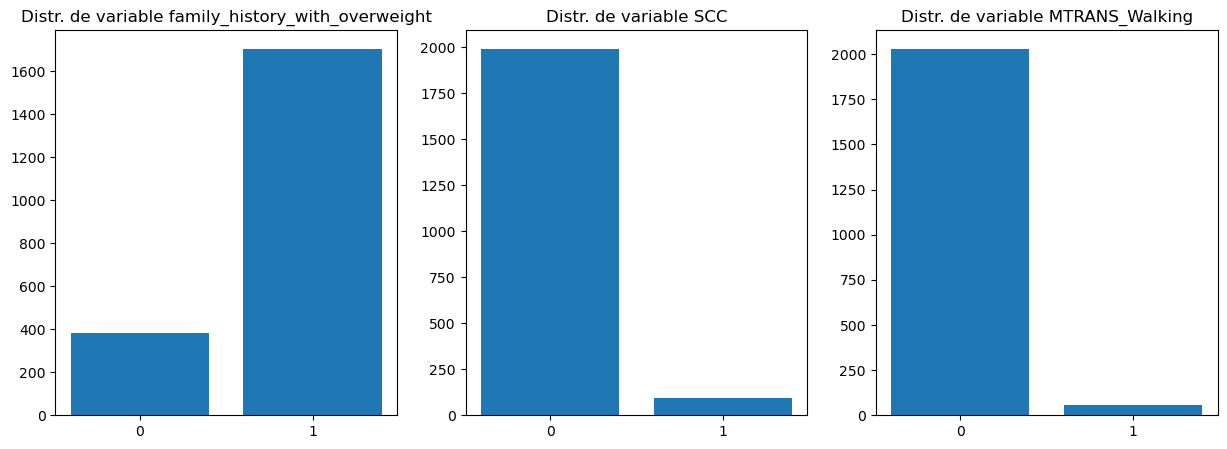

In [6]:
# Visualización de los atributos categoricos
fig,ax = plt.subplots(1,3,figsize=[15,5])

values = df['family_history_with_overweight'].value_counts().reset_index()
ax[0].bar(values['family_history_with_overweight'],values['count'])
ax[0].set_title('Distr. de variable family_history_with_overweight')
ax[0].set_xticks([0,1])

values = df['SCC'].value_counts().reset_index()
ax[1].bar(values['SCC'],values['count'])
ax[1].set_title('Distr. de variable SCC')
ax[1].set_xticks([0,1])

values = df['MTRANS_Walking'].value_counts().reset_index()
ax[2].bar(values['MTRANS_Walking'],values['count'])
ax[2].set_title('Distr. de variable MTRANS_Walking')
ax[2].set_xticks([0,1])
plt.show()

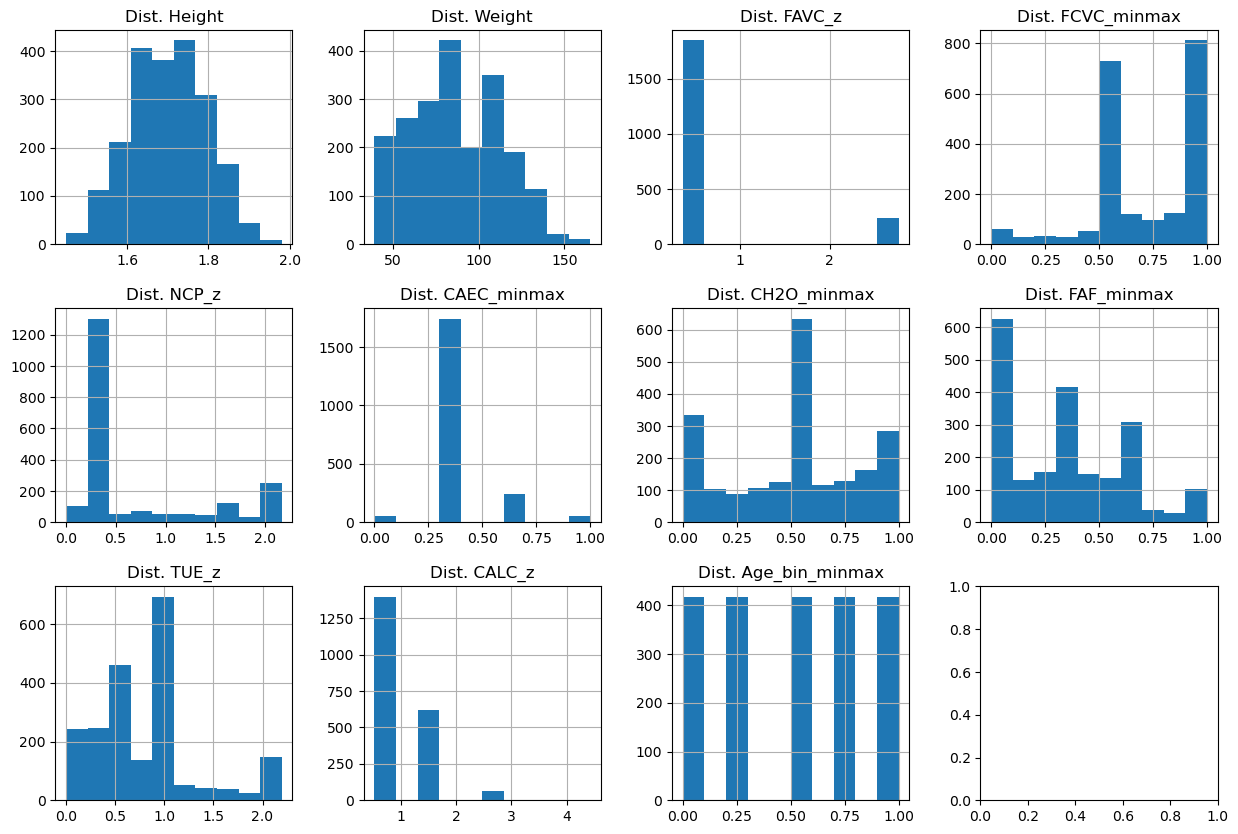

In [18]:
# Visualización de los atributos numericos
fig,ax = plt.subplots(3,4,figsize=[15,10])

df.hist('Height',ax=ax[0,0])
ax[0,0].set_title(f'Dist. Height')

df.hist('Weight',ax=ax[0,1])
ax[0,1].set_title(f'Dist. Weight')

df.hist('FAVC_z',ax=ax[0,2])
ax[0,2].set_title(f'Dist. FAVC_z')

df.hist('FCVC_minmax',ax=ax[0,3])
ax[0,3].set_title(f'Dist. FCVC_minmax')

df.hist('NCP_z',ax=ax[1,0])
ax[1,0].set_title(f'Dist. NCP_z')

df.hist('CAEC_minmax',ax=ax[1,1])
ax[1,1].set_title(f'Dist. CAEC_minmax')

df.hist('CH2O_minmax',ax=ax[1,2])
ax[1,2].set_title(f'Dist. CH2O_minmax')

df.hist('FAF_minmax',ax=ax[1,3])
ax[1,3].set_title(f'Dist. FAF_minmax')

df.hist('TUE_z',ax=ax[2,0])
ax[2,0].set_title(f'Dist. TUE_z')

df.hist('CALC_z',ax=ax[2,1])
ax[2,1].set_title(f'Dist. CALC_z')

df.hist('Age_bin_minmax',ax=ax[2,2])
ax[2,2].set_title(f'Dist. Age_bin_minmax')

plt.show()

In [19]:
# Distribución de la variable clase
class_values = df['NObeyesdad'].value_counts().reset_index().sort_values('NObeyesdad')
class_values['freq_rel'] = (class_values['count']/df.shape[0])*100
class_values

,NObeyesdad,count,freq_rel
6,0,272,13.039310
4,1,285,13.662512
3,2,289,13.854267
5,3,278,13.326942
0,4,342,16.395014
2,5,297,14.237776
1,6,323,15.484180


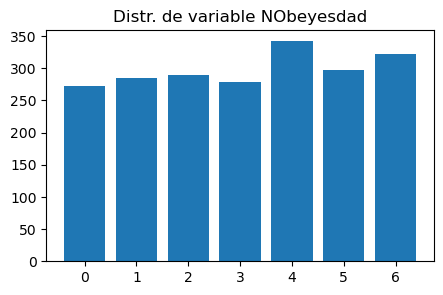

In [105]:
# Visualización de la variable clase
fig,ax = plt.subplots(figsize=[5,3])

ax.bar(class_values['NObeyesdad'],class_values['count'])
ax.set_title('Distr. de variable NObeyesdad')
ax.set_xticks([0,1,2,3,4,5,6])
plt.show()

* Numero de clases de la variable objetivo:
>* 0: 272 instancias 13.04%
>* 1: 285 instancias 13.66%
>* 2: 289 instancias 13.85%
>* 3: 278 instancias 13.32%
>* 4: 342 instancias 16.39%
>* 5: 297 instancias 14.23%
>* 6: 323 instancias 15.48%

En un par de párrafos haga un resumen de los principales hallazagos encontrados:

* El atributo clase se encuentra con una distribución homogenea.
* Muchos atributos numericos se encuentran estandarizados por diferentes metodos (z-score,MinMax) aspecto a tener en cuenta a la hora de preprocesar la información.
* Se debe tener en cuenta que la varaible peso y altura no se encuentran estandarizas

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [82]:
#Código que realice las transformaciones necesarias para poder realizar los procesos de modelación. Ej.One hot enconding
df_train = df.copy()

# No se utilizara la variable Artist Name
# Se codifican las variables categoricas del dataset
df_train = pd.get_dummies(df_train, columns=['family_history_with_overweight','SCC','MTRANS_Walking'])

# Se codifican las variables numericas faltantes del dataset
scaler = StandardScaler()
df_train['Height'] = scaler.fit_transform(df_train[['Height']])
df_train['Weight'] = scaler.fit_transform(df_train[['Weight']])

x = df_train.drop(columns=['NObeyesdad']).values
x = np.asarray(x).astype('float32')
y = df_train['NObeyesdad'].values

# Se crea vector de clasificación para la red neuronal
from keras.utils import to_categorical
y = to_categorical(y)

## División del dataset en datos de entrenamiento y datos de test 

In [83]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.

#Creacion de division de los datos de entrenamiento y pruebas en 80 - 20 respectivamente
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=124)

## Propuesta de arquitectura de red neuronal

Describe: 

+ Capa de entrada: 17 (El número de neuronas de la capa de entrada es igual al número de atributos de entrada del modelo)
+ Capas intermedias: Se crean dos capas intermedias con la función de activación relu de 100 neuronas
+ Capa de salida: Se crea la capa de salida con 7 neuronas para la salida de cada clase con la función softmax.

In [84]:
# Código de la estructuración de la red
model_rna = keras.Sequential()
model_rna.add(Dense(X_train.shape[1],input_dim=X_train.shape[1] , activation='relu'))
model_rna.add(Dense(100, activation='relu'))
model_rna.add(Dense(100, activation='relu'))
model_rna.add(Dense(Y_train.shape[1],activation='softmax'))

C:\Users\deuand01\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
#Código de la inspección del modelo de red
print("Model Summary:")
model_rna.summary()

Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 17)             │           306 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │         1,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 7)              │           707 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,913 (50.44 KB)

 Trainable params: 12,913 (50.44 KB)

 Non-trainable params: 0 (0.00 B)

##  Ajuste de modelo de Clasificación RNA

Mediante Python y utilizando al menos Keras sobre TensorFlow 2.0 (tensorflow.keras), entrena el modelo o modelos de red neuronal escogidos.

In [85]:
#Código de ajuste y entrenamiento

opti = {     'Adam': Adam(learning_rate=0.0005),
}

model_rna.compile(optimizer=opti['Adam'], loss='CategoricalCrossentropy',
                  metrics=['accuracy'])

historial = model_rna.fit(X_train,Y_train,epochs=100,batch_size=100,validation_data=(X_test, Y_test))

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.2585 - loss: 1.9094 - val_accuracy: 0.3373 - val_loss: 1.8374
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4171 - loss: 1.7926 - val_accuracy: 0.4522 - val_loss: 1.7097
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4864 - loss: 1.6636 - val_accuracy: 0.5072 - val_loss: 1.5398
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5154 - loss: 1.4765 - val_accuracy: 0.5359 - val_loss: 1.3448
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5555 - loss: 1.2805 - val_accuracy: 0.6268 - val_loss: 1.1729
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6103 - loss: 1.1384 - val_accuracy: 0.6579 - val_loss: 1.0245
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6648 - loss: 0.9903 - val_accuracy: 0.7010 - val_loss: 0.8977
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6952 - loss: 0.8716 - val_accuracy: 0.7129 - 

## Evaluación de modelo RNA

Defina las estadísticas (métricas) de evaluación, y dividiendo el dataset en datos de entrenamiento, validación y datos de test prueba tu propuesta.

Las metricas de evaluación del modelo de clasificación van a ser:

* Optimizador: Adam
* Learning_rate: 0.0005
* Funcion de perdida: CategoricalCrossentropy
* Metrica de evaluación: accuracy

### Visualice el progreso de entrenamiento del modelo y muestre las estadísticas de evaluación para los conjuntos de entrenamiento y validación.  

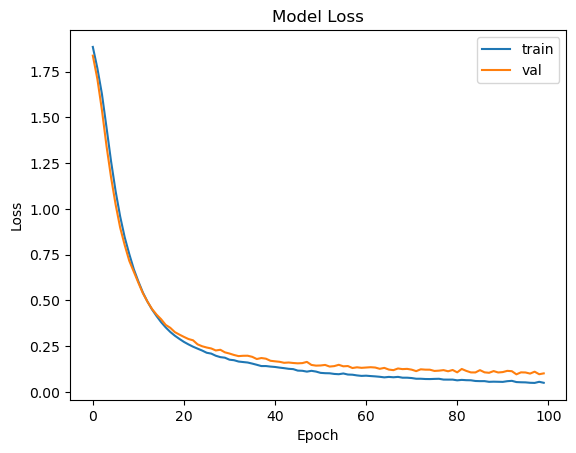

In [86]:
#Código de evaluación de la red propuesta (entrenamiento y validación)
#Código de la inspección del entrenamiento a partir de la función de perdida
plt.plot(historial.history['loss'], label='train')
plt.plot(historial.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

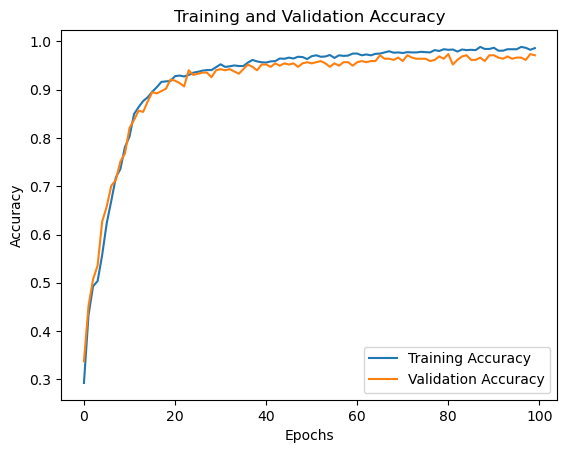

In [87]:
#Código de la inspección del entrenamiento a partir de la precisión
accuracy = historial.history['accuracy']
val_accuracy = historial.history['val_accuracy']

plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Evalúe los resultados  para el conjunto de test.

In [88]:
#Código de evaluación de la red propuesta (evaluación conjunto de test)
loss, accuracy = model_rna.evaluate(X_test, Y_test)
print("Test Accuracy:", accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9741 - loss: 0.0924 
Test Accuracy: 0.9712918400764465


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Modelo de red neuronal 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.98      0.91      0.95        57
           2       0.91      0.98      0.95        53
           3       0.98      0.93      0.96        58
           4       1.00      0.98      0.99        65
           5       0.98      1.00      0.99        55
           6       1.00      1.00      1.00        59

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418

Matriz de confusión


Text(0.5, 1.0, 'Modelo de red neuronal artificial')

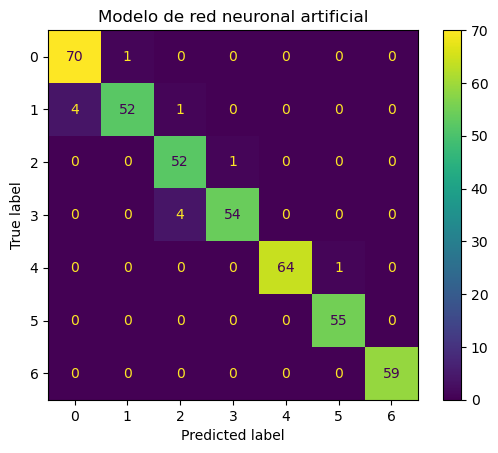

In [89]:
# Red neuronal artificial
y_pred_rna = model_rna.predict(X_test)

y_pred_t = np.argmax(y_pred_rna, axis=1)

y_test_non_categorical = np.argmax(Y_test, axis=1)
print('Modelo de red neuronal \n')
print(classification_report(y_test_non_categorical, y_pred_t))

# Matriz de confusion
print('Matriz de confusión')
disp_rna = ConfusionMatrixDisplay.from_predictions(y_test_non_categorical,
                                               y_pred_t
                                               )

disp_rna.ax_.set_title('Modelo de red neuronal artificial')


En general modelo red neuronal presenta un desempeño excepcional con una precisión general de 0.97 lo que indica  una alta confiabilidad en la clasificación correcta de las instancias.
>* Clase 0: El modelo tiene una precisión del 0.95 y una sensibilidad de 0.99 por lo cual el modelo no tiene problemas para clasificar ni detectar esta clase.
>* Clase 1: El modelo presenta una precisión del 0.98 y una sensibilidad de 0.91 por lo cual el modelo no tiene problemas para clasificar ni detectar esta clase.
>* Clase 2: El modelo tiene una precisión del 0.91 y una sensibilidad de 0.98 por lo cual el modelo no tiene problemas para clasificar ni detectar esta clase.
>* Clase 3: El modelo tiene una precisión del 0.98 y una sensibilidad de 0.93 por lo cual el modelo no tiene problemas para clasificar ni detectar esta clase.
>* Clase 4: El modelo tiene una precisión del 1.00 y una sensibilidad de 0.98 por lo cual el modelo no tiene problemas para clasificar ni detectar esta clase.
>* Clase 5: El modelo tiene una precisión del 0.98 y una sensibilidad de 1.00 por lo cual el modelo no tiene problemas para clasificar ni detectar esta clase.
>* Clase 6: El modelo tiene una precisión del 1.00 y una sensibilidad de 1.00 por lo cual el modelo no tiene problemas para clasificar ni detectar esta clase.

Las puntuaciones F1 que oscilan entre 0.95 y 1.00, reflejando un equilibrio adecuado entre precisión y recuperación. La clase 2 con área de mejora más significativa en términos de precisión 0.91, pero aún así logra una alta sensibilidad 0.98. En general, el soporte de las clases está bien distribuido, lo que proporciona una base sólida para la evaluación del modelo. Este modelo es, por lo tanto, una herramienta confiable para la tarea en cuestión y puede ser utilizado con confianza en aplicaciones prácticas, siempre y cuando se mantenga la vigilancia en la mejora continua y la validación contra nuevos datos.

## Ajuste de modelos de clasificación alternativos

Elige al menos un método de clasificación no basado en redes neuronales (p.ej. regresión logística, árboles de decisión, reglas de clasificación, random forest, SVM, etc).

In [125]:
# Modelo de arbol
# Se busca la mejor combinación de hiperparametros criterio y maxima profundidad
max_dep = [7,8,9,10,11,12,13,14,15,16,17,18]

pres = list()
pres1 = list()
pres2 = list()
rcll1 = list()
rcll2 = list()

for i in max_dep:
    model = DecisionTreeClassifier(max_depth=i,random_state=50)
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    pres.append(precision_score(Y_test, predictions,average='weighted'))
    pres1.append(precision_score(Y_test, predictions,average=None)[0])
    pres2.append(precision_score(Y_test, predictions,average=None)[1])
    rcll1.append(recall_score(Y_test, predictions, average=None)[0])
    rcll2.append(recall_score(Y_test, predictions, average=None)[1])

mstr = pd.DataFrame()
mstr['Profundidad'] = max_dep
mstr['Presicion_gen'] = pres
mstr['presicion_0'] = pres1
mstr['recall_0'] = rcll1
mstr['presicion_1'] = pres2
mstr['recall_1'] = rcll2
mstr

,Profundidad,Presicion_gen,presicion_0,recall_0,presicion_1,recall_1
0,7,0.889720,0.925926,0.925926,0.791667,0.678571
1,8,0.910292,0.925926,0.925926,0.777778,0.750000
2,9,0.924255,0.896552,0.962963,0.884615,0.821429
3,10,0.919341,0.896552,0.962963,0.880000,0.785714
4,11,0.914098,0.896552,0.962963,0.846154,0.785714
5,12,0.928044,0.896552,0.962963,0.884615,0.821429
6,13,0.919341,0.896552,0.962963,0.880000,0.785714
7,14,0.918440,0.896552,0.962963,0.846154,0.785714
8,15,0.918440,0.896552,0.962963,0.846154,0.785714
9,16,0.918440,0.896552,0.962963,0.846154,0.785714


Teniendo en cuenta los resultados de profundidad se oberva que la profundidad optima es de 12, a partir de este valor no sé una mejora en las metricas de precisión y sensibilidad de las clases

In [126]:
crit = ['gini','entropy']

pres = list()
pres1 = list()
pres2 = list()
rcll1 = list()
rcll2 = list()

for i in crit:
    model = DecisionTreeClassifier(criterion=i,random_state=50)
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    pres.append(precision_score(Y_test, predictions,average='weighted'))
    pres1.append(precision_score(Y_test, predictions,average=None)[0])
    pres2.append(precision_score(Y_test, predictions,average=None)[1])
    rcll1.append(recall_score(Y_test, predictions, average=None)[0])
    rcll2.append(recall_score(Y_test, predictions, average=None)[1])

mstr = pd.DataFrame()
mstr['Criterio'] = crit
mstr['Presicion_gen'] = pres
mstr['presicion_0'] = pres1
mstr['recall_0'] = rcll1
mstr['presicion_1'] = pres2
mstr['recall_1'] = rcll2
mstr

,Criterio,Presicion_gen,presicion_0,recall_0,presicion_1,recall_1
0,gini,0.918440,0.896552,0.962963,0.846154,0.785714
1,entropy,0.956322,1.000000,0.962963,0.848485,1.000000


Se observa que no hay una gran diferencia entre los criterios de evaluación, pero se observa un ligero mejor desempeño del criterio entropy, por lo cual este sera el modelo seleccionado

In [127]:
#Código de ajuste del modelo 1
model_dt = DecisionTreeClassifier(criterion='entropy',max_depth=12,random_state=50)
model_dt.fit(X_train,Y_train)
Y_pred_dt1 = model_dt.predict(X_test)

Presición general del modelo de arbol de decisión es: 0.9519230769230769
Instancias correctamente clasificadas del modelo de arbol de decisión es: 198.0
Instancias incorrectamente clasificadas del modelo de arbol de decisión es: 10.0

Modelo de arbol de decisión 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.85      1.00      0.92        28
           2       0.96      0.86      0.91        29
           3       0.96      0.96      0.96        28
           4       1.00      0.91      0.95        34
           5       0.91      1.00      0.95        30
           6       1.00      0.97      0.98        32

    accuracy                           0.95       208
   macro avg       0.95      0.95      0.95       208
weighted avg       0.96      0.95      0.95       208

Matriz de confusión


Text(0.5, 1.0, 'Modelo de arbol de desición')

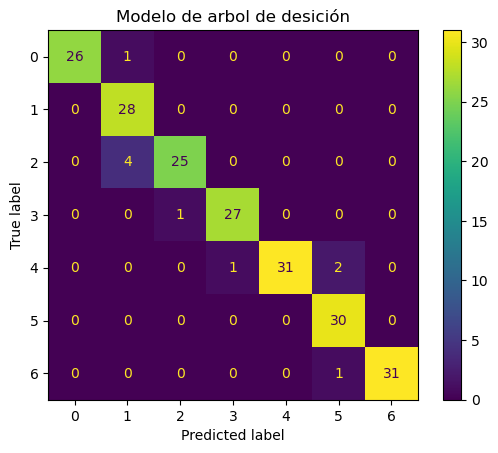

In [128]:
#Código para mostrar la evaluación de los modelos
# Arbol de decisión
Y_test_dt= np.argmax(Y_test, axis=1)
Y_pred_dt = np.argmax(Y_pred_dt1, axis=1)

# Instancias clasificadas correctamente
print(f'Presición general del modelo de arbol de decisión es: {accuracy_score(Y_test_dt, Y_pred_dt)}')
print(f'Instancias correctamente clasificadas del modelo de arbol de decisión es: {round(accuracy_score(Y_test_dt, Y_pred_dt)*len(Y_test_dt),0)}')

# Instancias clasificadas incorrectamente
print(f'Instancias incorrectamente clasificadas del modelo de arbol de decisión es: {round((1-accuracy_score(Y_test_dt, Y_pred_dt))*len(Y_test_dt),0)}\n')

print('Modelo de arbol de decisión \n')
report = classification_report(Y_test_dt, Y_pred_dt)
print(report)

# Matriz de confusion
print('Matriz de confusión')
disp_dt = ConfusionMatrixDisplay.from_predictions(Y_test_dt,
                                               Y_pred_dt
                                               )

disp_dt.ax_.set_title('Modelo de arbol de desición')

* En general modelo de arbol de decision presenta un desempeño excepcional con una precisión general de 0.937 lo que indica una alta confiabilidad en la clasificación correcta de las instancias.
>* Clase 0: El modelo tiene una precisión del 0.97 y una sensibilidad de 0.97 por lo cual el modelo no tiene problemas para clasificar ni detectar esta clase.
>* Clase 1: El modelo presenta una precisión del 0.91 y una sensibilidad de 0.88 por lo cual el modelo no tiene problemas para clasificar ni detectar esta clase.
>* Clase 2: El modelo tiene una precisión del 0.83 y una sensibilidad de 0.94 por lo cual el modelo no tiene problemas para clasificar ni detectar esta clase.
>* Clase 3: El modelo tiene una precisión del 1.00 y una sensibilidad de 0.90 por lo cual el modelo no tiene problemas para clasificar ni detectar esta clase.
>* Clase 4: El modelo tiene una precisión del 0.97 y una sensibilidad de 0.94 por lo cual el modelo no tiene problemas para clasificar ni detectar esta clase.
>* Clase 5: El modelo tiene una precisión del 0.90 y una sensibilidad de 1.00 por lo cual el modelo no tiene problemas para clasificar ni detectar esta clase.
>* Clase 6: El modelo tiene una precisión del 0.98 y una sensibilidad de 0.93 por lo cual el modelo no tiene problemas para clasificar ni detectar esta clase.

Las puntuaciones F1 que oscilan entre 0.87 y 0.98, reflejando un equilibrio adecuado entre precisión y recuperación. La clase 2 tiene el área de mejora más significativa en términos de precisión 0.82, pero aún así logra una alta sensibilidad 0.94. En general, el soporte de las clases está bien distribuido, lo que proporciona una base sólida para la evaluación del modelo. Este modelo es, por lo tanto, una herramienta confiable para la tarea en cuestión y puede ser utilizado con confianza en aplicaciones prácticas, siempre y cuando se mantenga la vigilancia en la mejora continua y la validación contra nuevos datos.


## Comparación del desempeño de modelos

Muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

Modelo de arbol de decisión
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.82      0.96      0.89        28
           2       0.92      0.83      0.87        29
           3       0.96      0.96      0.96        28
           4       1.00      0.91      0.95        34
           5       0.91      1.00      0.95        30
           6       1.00      0.97      0.98        32

    accuracy                           0.94       208
   macro avg       0.94      0.94      0.94       208
weighted avg       0.95      0.94      0.94       208

Modelo de red neuronal artificial
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.98      0.91      0.95        57
           2       0.91      0.98      0.95        53
           3       0.98      0.93      0.96        58
           4       1.00      0.98      0.99        65
           5    

Text(0.5, 1.0, 'Modelo de red neuronal artificial')

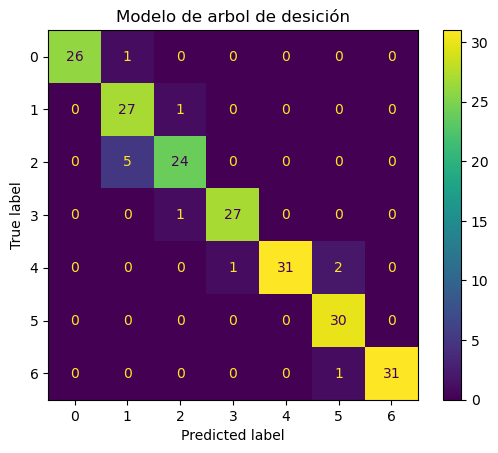

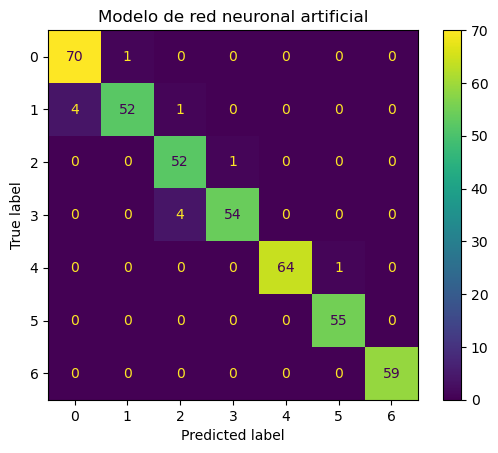

In [95]:
print('Modelo de arbol de decisión')
print(classification_report(Y_test_dt, Y_pred_dt))
print('Modelo de red neuronal artificial')
print(classification_report(y_test_non_categorical, y_pred_t))

disp_dt = ConfusionMatrixDisplay.from_predictions(Y_test_dt,
                                               Y_pred_dt
                                               )

disp_dt.ax_.set_title('Modelo de arbol de desición')

disp_rna = ConfusionMatrixDisplay.from_predictions(y_test_non_categorical,
                                               y_pred_t
                                               )

disp_rna.ax_.set_title('Modelo de red neuronal artificial')

In [132]:
# Validación cruzada para el modelo de arbol de decisión
results_dt = []
kf = StratifiedKFold(10,shuffle=True,random_state=50)
cv_results_dt = cross_val_score(model_dt, X_train, np.argmax(Y_train,axis=1), cv=kf, scoring='accuracy')
results_dt.append(cv_results_dt)

# Validación cruzada para el modelo de red neuronal
fold_no = 0
results_rna = []

for train,test in kf.split(x,df_train['NObeyesdad']):
    fold_no += 1
    print('fold number: ',fold_no)
    
    X_train = x[train]
    Y_train = y[train]

    X_test = x[test]
    Y_test= y[test]

    model = keras.Sequential()
    model.add(Dense(X_train.shape[1],input_dim=X_train.shape[1] , activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(Y_train.shape[1],activation='softmax'))

    opti = {     'Adam': Adam(learning_rate=0.0005),
    }

    model.compile(optimizer=opti['Adam'], loss='CategoricalCrossentropy',
                  metrics=['accuracy'])

    historial = model.fit(X_train,Y_train,epochs=100,batch_size=100,validation_data=(X_test, Y_test),verbose=False)
    Y_pred = model.predict(X_test)
    loss, accuracy = model.evaluate(X_test, Y_test)
    results_rna.append(accuracy)

print(f'DT {round(cv_results_dt.mean(),3)}, ({round(cv_results_dt.std(),5)})')
print(f'RNA: {round(np.average(results_rna),3)} ({round(np.std(results_rna),5)})')

fold number:  1


C:\Users\deuand01\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9324 - loss: 0.1253 
fold number:  2
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9551 - loss: 0.1662 
fold number:  3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9308 - loss: 0.2471 
fold number:  4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9406 - loss: 0.2023 
fold number:  5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9817 - loss: 0.0670 
fold number:  6
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9775 - loss: 0.0906 
fold number:  7
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9102 - loss: 0.1593 
fold number:  8
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9222 - loss: 0.1856 
fold num

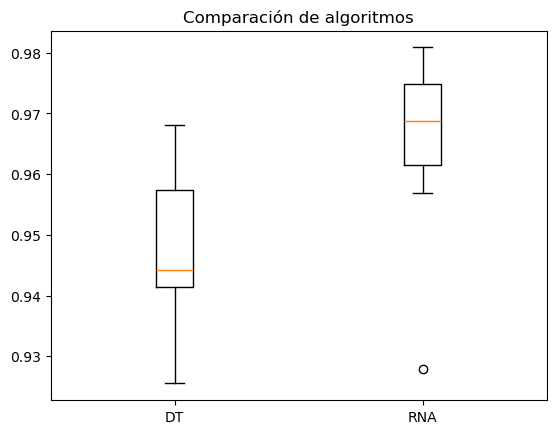

In [98]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica
plt.boxplot([cv_results_dt,np.array(results_rna)], labels=['DT','RNA'])
plt.title('Comparación de algoritmos')
plt.show()

Construya un párrafo con los principales hallazgos.

El modelo de red neuronal presenta un mejor desempeño que el modelo de árbol de decisión, con una precisión general superior (dt: 0.95 < rna: 0.97), para el modelo de árbol de decisión la clase de mayor dificultad fue la clase 5 con una precisión de 0.91 pero con una sensibilidad 1.00 por lo cual tienen una buena capacidad de detección de la clase, en cambio para el modelo de red neuronal la clase de mayor dificultad para clasificar fue la clase 2 con una precisión de 0.91 pero con una sensibilidad de 0.98 por lo cual tiene una buena capacidad de detectar esta clase, los valores f1 score se encuentran en ambos modelos se encuentran en un rango de 0.91 - 1.00 por lo cual existe un buen balance entre precisión y la sensibilidad del modelo. En tiempo de computación el modelo de red neuronal presenta un mayor coste computacional al modelo de árbol de decisión, factor para tener en cuenta a la hora de tener que realizar reentrenamiento del modelo. Evaluando ambos modelos con el método de validación cruzada se determina que el modelo de red neuronal presenta un mejor comportamiento para el conjunto de datos con una precisión promedio de 0.965 mientras que el modelo de árbol de decisión presenta un promedio de 0.95.

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Realice en este espacio todo el análsis de resultados final incluyendo: 
Resultados comparados. Conclusiones objetivas y significantes con base a las diferentes métricas escogidas.

* El modelo de red neuronal presenta un mejor desempeño que el modelo de árbol de decisión, con una precisión general superior (dt: 0.95 < rna: 0.97), para el modelo de árbol de decisión la clase de mayor dificultad fue la clase 5 con una precisión de 0.91 pero con una sensibilidad 1.00 por lo cual tienen una buena capacidad de detección de la clase, en cambio para el modelo de red neuronal la clase de mayor dificultad para clasificar fue la clase 2 con una precisión de 0.91 pero con una sensibilidad de 0.98 por lo cual tiene una buena capacidad de detectar esta clase.

* Los valores f1 score se encuentran en ambos modelos se encuentran en un rango de 0.91 - 1.00 por lo cual existe un buen balance entre precisión y la sensibilidad del modelo.

* n tiempo de computación el modelo de red neuronal presenta un mayor coste computacional al modelo de árbol de decisión, factor para tener en cuenta a la hora de tener que realizar reentrenamiento del modelo.

* Evaluando ambos modelos con el método de validación cruzada se determina que el modelo de red neuronal presenta un mejor comportamiento para el conjunto de datos con una precisión promedio de 0.965 mientras que el modelo de árbol de decisión presenta un promedio de 0.95.

Explicación de cómo se podrían mejorar los resultados obtenidos por las redes neuronales, independientemente de que mejoren o no a los algoritmos no basados en redes neuronales.

* La red neuronal se podría ser beneficiada con los siguientes puntos:

>* Utilizar mayor numero de datos.
>* Ajuste de hiperparámetros: Los hiperparámetros, como la tasa de aprendizaje, el tamaño del lote, la cantidad de capas ocultas, entre otros hiperparametros de la red.
>* Utilizar técnicas de regularización en caso de presenciar que en algún momento la precisión de los datos de validación empiece a disminuir mientras que la precisión de los datos de entrenamiento sigue aumentando.